<a href="https://colab.research.google.com/github/chandralakagwad/Playstore-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First thing is to read the csv files in colab

In [3]:
file_path = '/content/drive/My Drive/Almabetter dataset/Play Store Data.csv'

file1_path = '/content/drive/My Drive/Almabetter dataset/User Reviews.csv'

play_store_df = pd.read_csv(file_path)
user_df = pd.read_csv(file1_path)

In [4]:
play_store_df.shape, user_df.shape

((10841, 13), (64295, 5))

In [5]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_df_copy = pd.DataFrame(play_store_df)

#Data Cleansing : Before we start with analysing the data. Let us clean the data. Such as NaN values and some wrong formats present in the data

In [6]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


To delete the duplicate values present in play store dataframe

In [7]:
# To eliminate duplicate rows
play_store_df.drop_duplicates(subset='App',keep='last',inplace=True)

In [8]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Find the outliers present in Rating column and delete them.
An outlier is the value that is beyond the expected value of a column

In [9]:
# to find the outliers in rating that is number of apps that have rating greater than 5

play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Dropping the outlier that we have on 10472 row

play_store_df.drop([10472],inplace=True)

In [ ]:
#Replacing all the NaN values present in Ratings with the median value(4.3)

play_store_df['Rating'].fillna(play_store_df['Rating'].median(),inplace=True)

In [11]:
play_store_df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

To delete the outlier row from User Reviews dataframe also

In [15]:
user_df = user_df[user_df['App'] !="Life Made WI-Fi Touchscreen Photo Frame" ]

Formatting the numeric columns that are of object datatype.




In [12]:
#Changing the datatype of Reviews to float
play_store_df['Reviews'] = play_store_df['Reviews'].astype(float)

# Change value 'Varies with device' in Size column with NaN
play_store_df.replace('Varies with device',np.nan,inplace=True)

To eliminate the suffix M (MB) and K(KB) present in Size column and changing it to float

In [16]:
#To remove M and K from size column and convert it to float
play_store_df.replace({'Size': '[M]'},'',regex=True,inplace=True)

play_store_df['Size']= play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str( x) else x)


To eliminate + sign from Install Column and converting it to float

In [18]:
#To remove '+' from installs column and convert it to float

play_store_df.replace({'Installs':'\W'},'',regex=True,inplace=True) # \W - Matches any non-alphanumeric character

play_store_df['Installs'] = play_store_df['Installs'].astype(float) 

#play_store_df.head()

To eliminate '$' from Price column

In [28]:
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


#Now we have cleansed our data and ready for analysing it

#1. To know top 10 highest rated category of apps

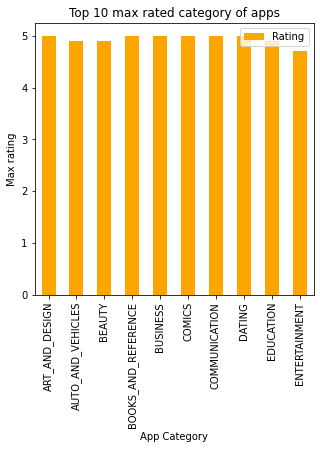

In [65]:
play_store_df.groupby('Category').agg({'Rating':'max'}).head(10).plot(kind='bar',color='orange')
plt.title('Top 10 max rated category of apps')
plt.ylabel('Max rating')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (5,5)

#2. Number of apps in each category

In [ ]:
num_of_apps = play_store_df['Category'].value_counts()

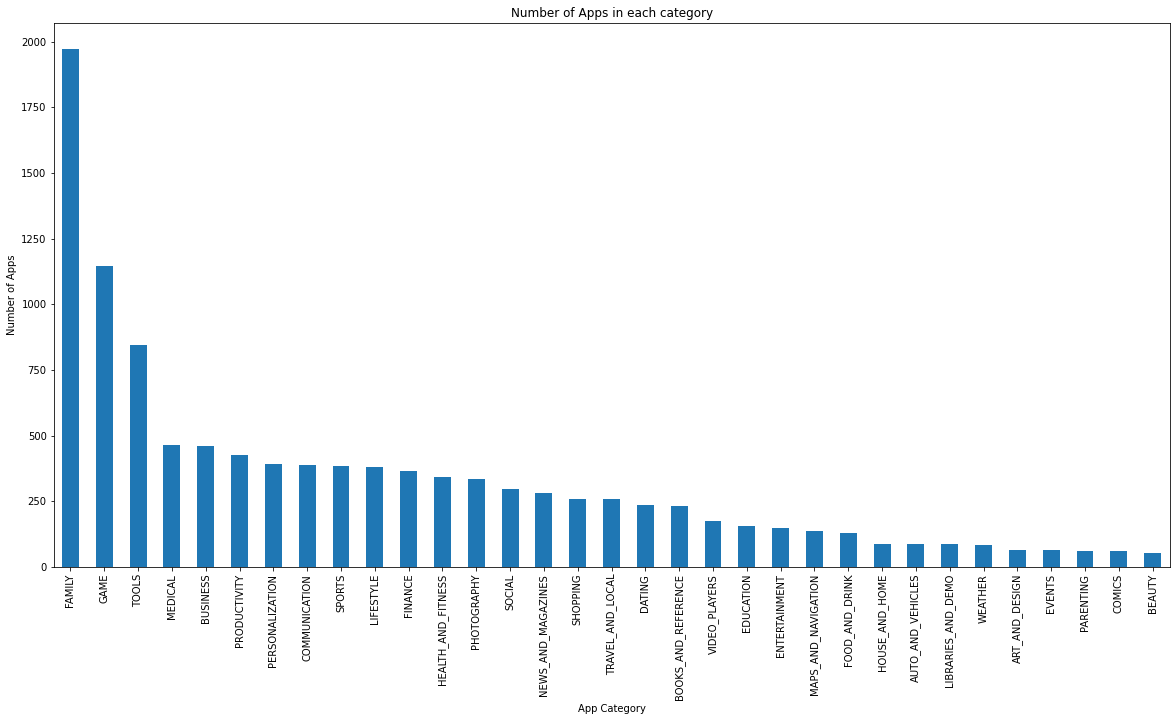

In [ ]:
num_of_apps.plot(kind='bar')

plt.title('Number of Apps in each category')
plt.ylabel('Number of Apps')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (10,10)

#3. Distribution of sentiment across different Category


In [24]:
#to know the mode value of sentiment column in user_df
user_df['Sentiment'].mode()

0    Positive
dtype: object

In [25]:
#to know the number of NaN values in User_df
user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [26]:
#Filling NaN values with mode for sentiment column

user_df['Sentiment'].fillna(user_df['Sentiment'].mode,inplace=True)

user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                     0
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

To merge the play_store data and user_data in order to map the reviews and other details with the app sepcific data present in play_store df

In [27]:
merged_df = play_store_df.merge(user_df,on='App')
merged_df.shape

(61556, 17)

**To know the positive sentiment across different category of apps**

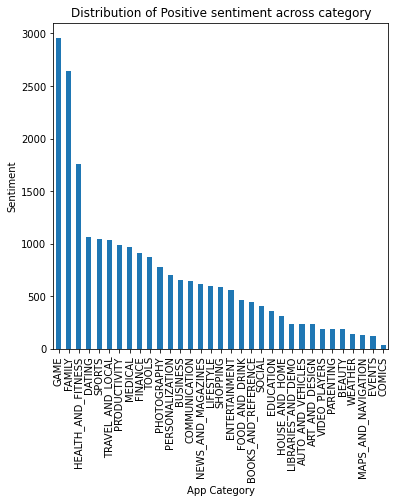

In [58]:
positive_sentiment = merged_df[merged_df['Sentiment'] == 'Positive']
x= positive_sentiment['Category'].value_counts()

plt.title('Distribution of Positive sentiment across category')
x.plot(kind='bar')
plt.ylabel('Sentiment')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (6,6)


**To know the Negative sentiment across different category of apps**

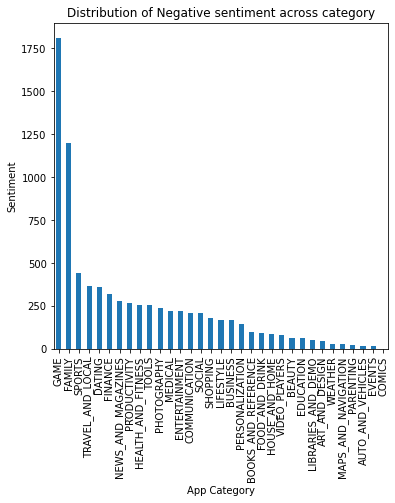

In [56]:
negative_sentiment = merged_df[merged_df['Sentiment'] == 'Negative']
y= negative_sentiment['Category'].value_counts()
plt.title('Distribution of Negative sentiment across category')
y.plot(kind='bar')
plt.ylabel('Sentiment')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (6,6)

**To know the Neutral sentiment across different category of apps**

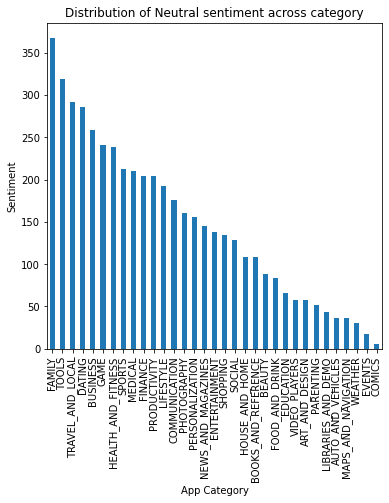

In [57]:
neutral_sentiment = merged_df[merged_df['Sentiment'] == 'Neutral']
z= neutral_sentiment['Category'].value_counts()
plt.title('Distribution of Neutral sentiment across category')
z.plot(kind='bar')
plt.ylabel('Sentiment')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (6,6)


#4. To know the top 10 category of apps installed

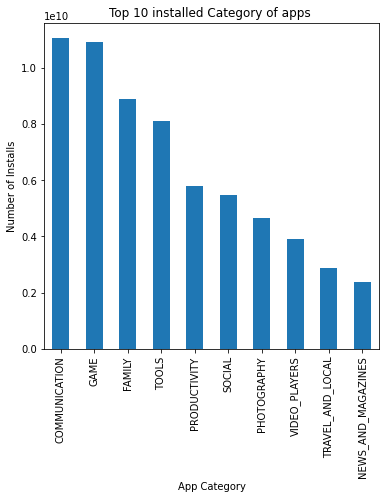

In [74]:
play_store_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 installed Category of apps ')
plt.ylabel('Number of Installs')
plt.xlabel('App Category')
plt.rcParams['figure.figsize'] = (6,6)


#5 To know the number of free and paid apps installed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


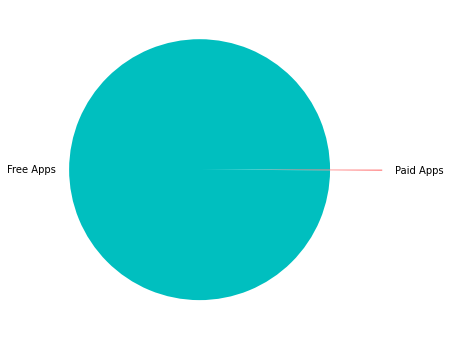

In [94]:
type_of_app = play_store_df.groupby('Type').agg({'Installs':'sum'})
my_explode = [0.2,0.2]
mycolors = ["c", "r"]

plt.pie(type_of_app,labels=['Free Apps','Paid Apps'],explode=my_explode,colors=mycolors)
plt.show()